In [26]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import os
import glob

Hello Neuralink!
_wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98741, comptype='NONE', compname='not compressed')


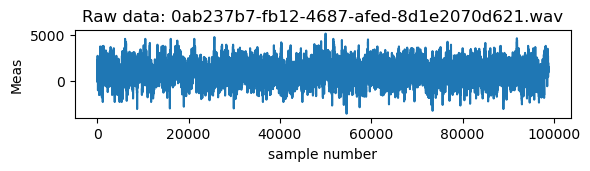

In [14]:
# Set file path and make sure the file exists
fileDir = os.path.abspath("data")
fileName = "0ab237b7-fb12-4687-afed-8d1e2070d621.wav"
filePath = os.path.join(fileDir, fileName)
os.path.isfile(filePath)

# Open the file
with wave.open(filePath) as dataFile:
    print("Hello Neuralink!")

    # Get some info about the file
    dataParams = dataFile.getparams()
    print(dataParams)

    # Read one second of data
    byteData = dataFile.readframes(dataParams.nframes)
    rawData = np.frombuffer(byteData, dtype=np.int16)

# Plot the raw data
ax = plt.subplot(111)
ax.plot(rawData)
ax.set_title('Raw data: %s' % fileName)
ax.set_xlabel("sample number")
ax.set_ylabel("Meas")
ax.set_aspect(2)
plt.show()

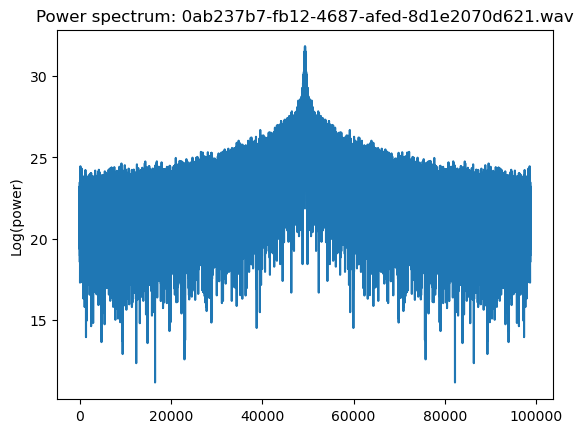

In [16]:
# Power spectrum
dataZeroMean = rawData - np.mean(rawData)

# Take the FT and shift the DC component to the center, and remove the DC component
dataFt = np.fft.fftshift(np.fft.fft(dataZeroMean)[1:])
dataPower = np.log(np.power(np.abs(dataFt), 2))

# Plot the power spectrum
ax = plt.subplot(111)
ax.plot(dataPower)
ax.set_title('Power spectrum: %s' % fileName)
ax.set_ylabel('Log(power)')
plt.show()

In [36]:
# Next, see whether the data are correlated across files.

## Load all the files and store them in a single 2D array.
# Get all the file paths
filePaths = glob.glob(os.path.join(fileDir, "*.wav"))
numFiles = len(filePaths)

# Preallocate the data array
rawDataArray = np.zeros([numFiles,dataParams.nframes],dtype=np.int16)

# Load each file and populate one row of the data array with its data 
for k, filePath in enumerate(filePaths):
    with wave.open(filePath) as dataFile:

        # Get some info about the file
        dataParams = dataFile.getparams()
        print("%d: %s" % (k, dataParams))
    
        # Read one second of data
        # byteData = dataFile.readframes(-1)
        # rawData = np.frombuffer(byteData, dtype=np.int16)
        # rawDataArray[k, :] = rawData
    

# files
# Allocate the array
# len(rawData)
# dataParams.nframes

0: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98699, comptype='NONE', compname='not compressed')
1: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98721, comptype='NONE', compname='not compressed')
2: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=99310, comptype='NONE', compname='not compressed')
3: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98709, comptype='NONE', compname='not compressed')
4: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98642, comptype='NONE', compname='not compressed')
5: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98714, comptype='NONE', compname='not compressed')
6: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98726, comptype='NONE', compname='not compressed')
7: _wave_params(nchannels=1, sampwidth=2, framerate=19531, nframes=98724, comptype='NONE', compname='not compressed')
8: _wave_params(nchannels=1, sampwidth=2, framerate=1953